# Experimental regularization loss
*Use L(1 or 2) loss of the label loss derivative as a regularization loss.*  

## Setup

### Imports

In [7]:
import plotly.express as px
import torch
from torch import Tensor
import matplotlib.pyplot as plt
from torch.nn import CrossEntropyLoss
from torchvision.utils import make_grid
from torchvision.datasets import MNIST
from torch.optim.lr_scheduler import OneCycleLR
from torchvision.transforms import (
    Compose,
    ToTensor,
    Normalize,
    RandomCrop,
    RandomHorizontalFlip,
)


from trainer import Trainer
from data_loaders import MyDataLoader

### Search for an accelerator

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

### Datasets, transforms and data loaders

In [3]:
! mkdir -p datasets

#### Transforms

In [15]:
CHANNELS_MEAN = (0.1307, )
CHANNELS_STD = (0.3081, )

training_transform = Compose([
    # RandomCrop(28, padding=6, padding_mode="constant"),
    ToTensor(),
    Normalize(CHANNELS_MEAN, CHANNELS_STD, inplace=True),
])

validation_transform = Compose([ToTensor(), Normalize(CHANNELS_MEAN, CHANNELS_STD)])

#### Datasets

In [16]:
training_dataset = MNIST(root="./datasets/mnist/", train=True, download=True, transform=training_transform)
validation_dataset = MNIST(root="./datasets/mnist/", train=False, transform=validation_transform)

#### Data loaders

In [17]:
BATCH_SIZE = 128

training_dl = MyDataLoader(training_dataset, BATCH_SIZE, shuffle=True, num_workers=3, device=device, pin_memory=True)
validation_dl = MyDataLoader(validation_dataset, BATCH_SIZE * 2, num_workers=3, device=device, pin_memory=True)

#### Dataset visualization

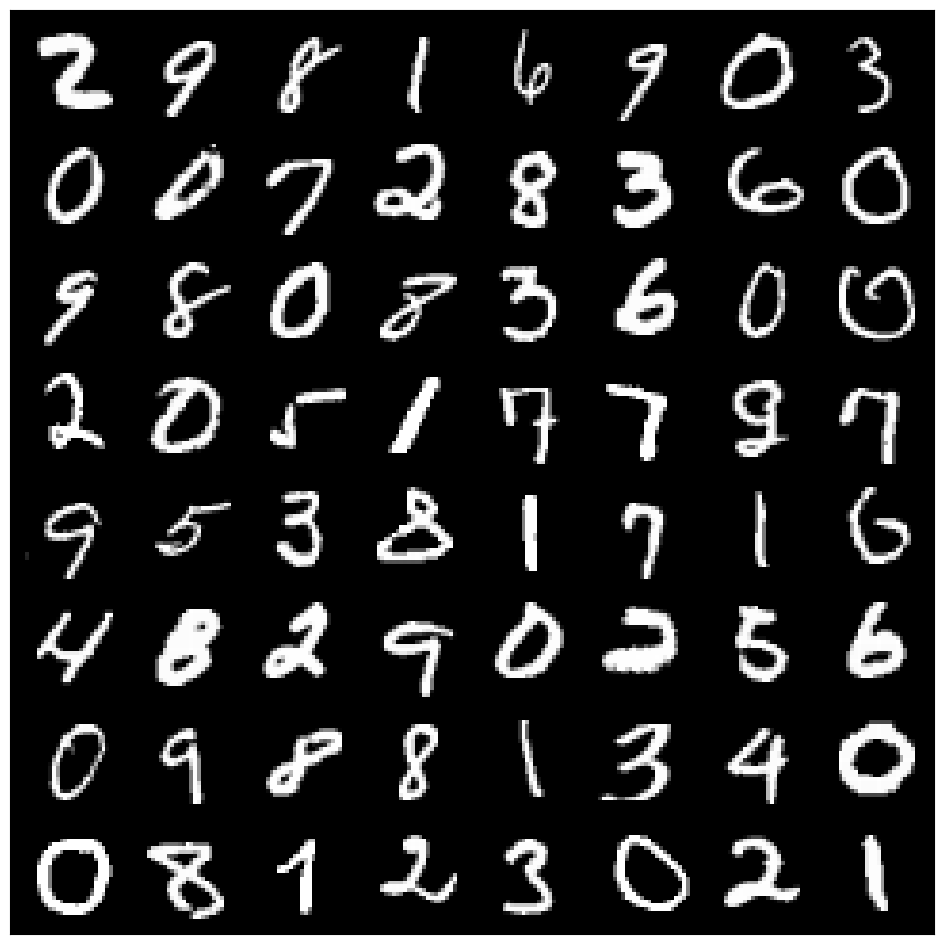

In [18]:
base_imgs, labels = next(iter(training_dl))
images, labels = base_imgs.cpu(), labels.cpu()
as_tensor = lambda stats: Tensor(stats).view(1, 1, 1, 1)
unormalize_imgs =  lambda imgs: imgs * as_tensor(CHANNELS_STD) + as_tensor(CHANNELS_MEAN)
images = unormalize_imgs(images)
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))

### Model definition